In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\Eda\Desktop\dnz\test2\Sleep_health_and_lifestyle_dataset.csv')

df.head()
df.set_index('Person ID', inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [79]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [80]:
df.isnull().sum()
df.loc[:, 'Sleep Disorder'].fillna('None', inplace= True)

C:\Users\Eda\AppData\Local\Temp\ipykernel_12336\882933957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, 'Sleep Disorder'].fillna('None', inplace= True)


In [81]:
unique_list = [(f'{n}:, {df[n].unique()}') for n in df.columns]
unique_list

["Gender:, ['Male' 'Female']",
 'Age:, [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 50 51 52\n 53 54 55 56 57 58 59]',
 "Occupation:, ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'\n 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']",
 'Sleep Duration:, [6.1 6.2 5.9 6.3 7.8 6.  6.5 7.6 7.7 7.9 6.4 7.5 7.2 5.8 6.7 7.3 7.4 7.1\n 6.6 6.9 8.  6.8 8.1 8.3 8.5 8.4 8.2]',
 'Quality of Sleep:, [6 4 7 5 8 9]',
 'Physical Activity Level:, [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]',
 'Stress Level:, [6 8 7 4 3 5]',
 "BMI Category:, ['Overweight' 'Normal' 'Obese' 'Normal Weight']",
 "Blood Pressure:, ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'\n '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'\n '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'\n '118/75']",
 'Heart Rate:, [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]',
 'Daily Steps:, [ 4200

In [82]:
df.replace({'BMI Category':{'Normal Weight': 'Normal'}}, inplace= True) 

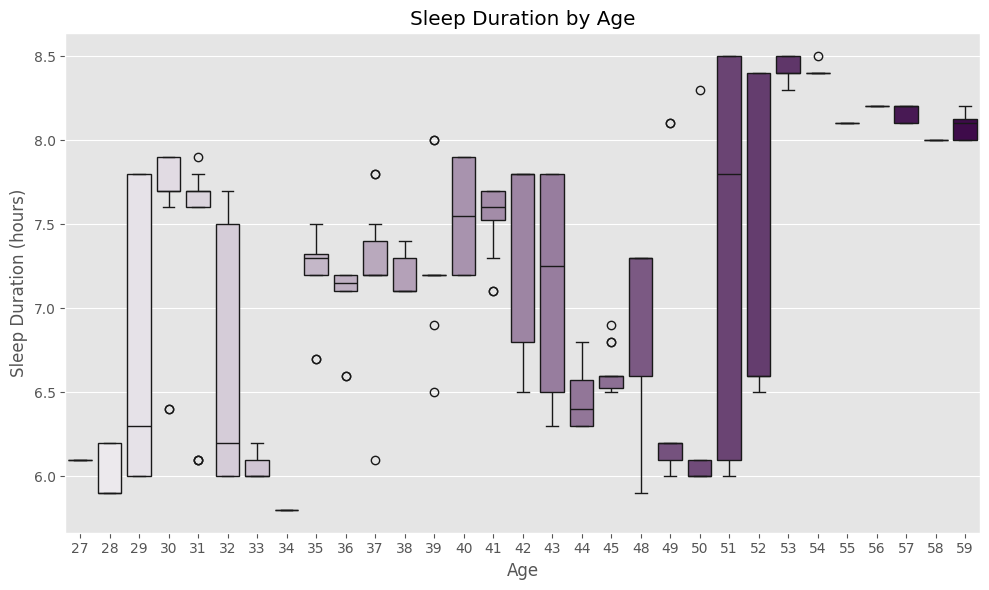

In [133]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data= df, x='Age', y='Sleep Duration', hue= 'Age', legend= False, palette='light:#440154')
plt.title('Sleep Duration by Age')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.tight_layout()
plt.savefig('graphs/sleep_duration_by_age.png')
plt.show()


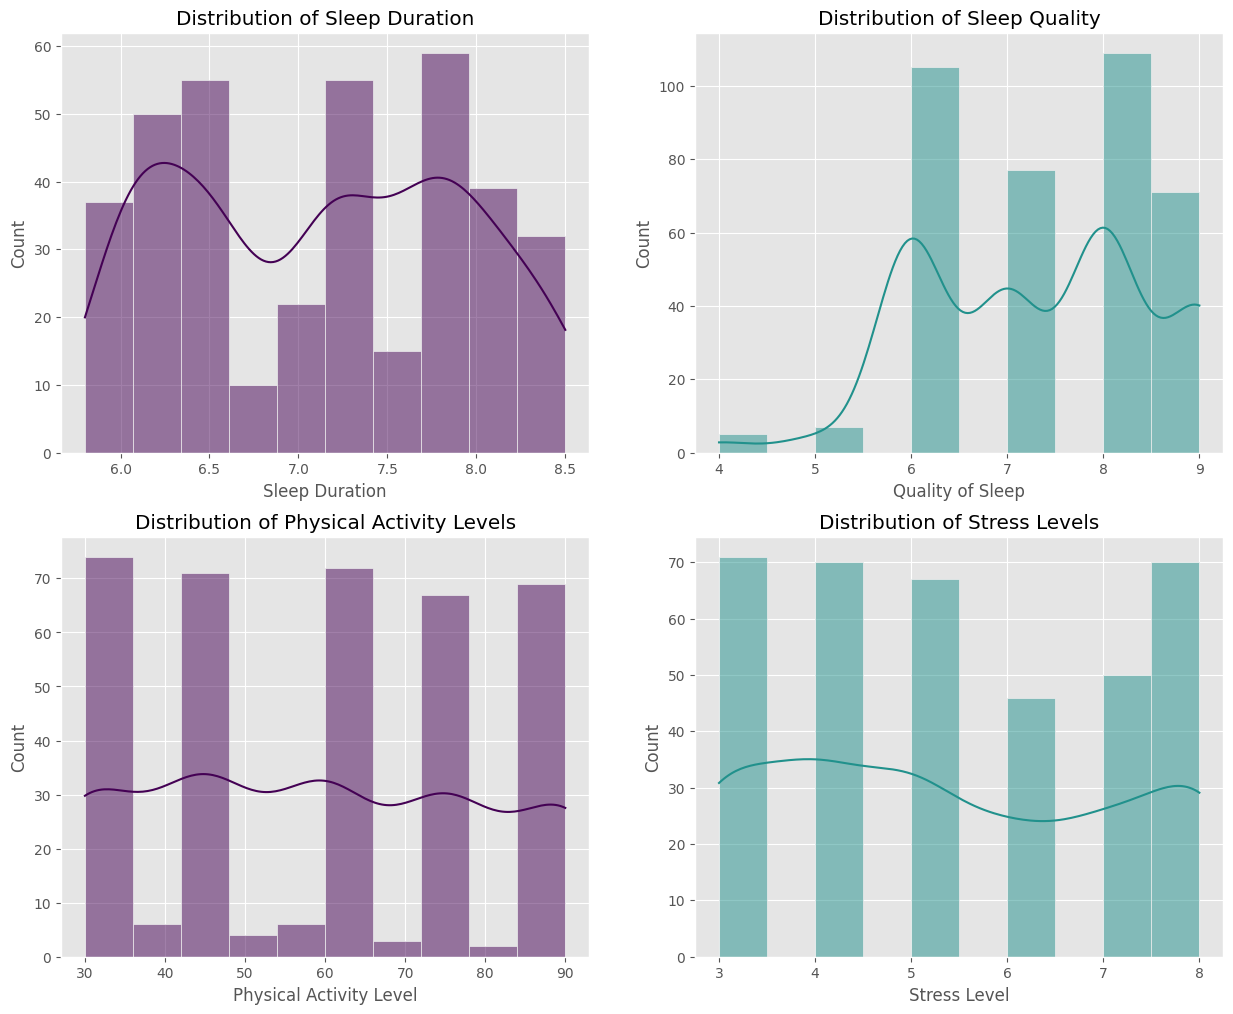

In [130]:
# Distribution plots for key metrics
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15, 12))
plt.style.use('ggplot')

sns.histplot(data=df, x='Sleep Duration', kde=True, ax=ax1, color='#440154')
ax1.set_title('Distribution of Sleep Duration')

sns.histplot(data=df, x='Quality of Sleep', kde=True, ax=ax2, color='#21918c')
ax2.set_title('Distribution of Sleep Quality')

sns.histplot(data=df, x='Physical Activity Level', kde=True, ax=ax3, color='#440154')
ax3.set_title('Distribution of Physical Activity Levels')

sns.histplot(data=df, x='Stress Level', kde=True, ax=ax4, color='#21918c')
ax4.set_title('Distribution of Stress Levels')
plt.savefig('graphs/distribution_of_stress_levels.png')

<Figure size 1000x600 with 0 Axes>

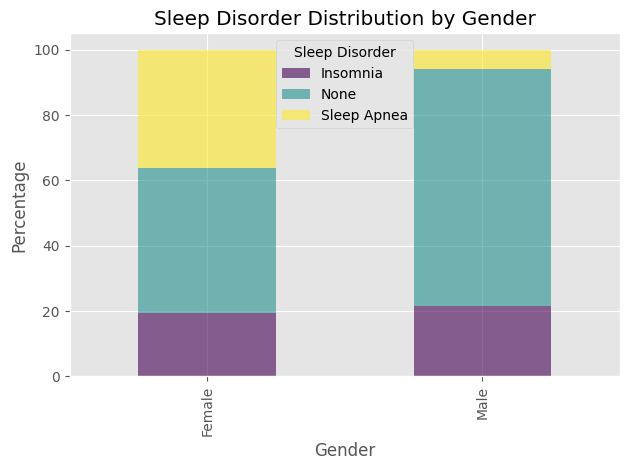

In [117]:
# Sleep disorder distribution by gender
plt.figure(figsize=(10,6))
disorder_by_gender = pd.crosstab(df['Gender'], df['Sleep Disorder'], normalize='index') * 100
disorder_by_gender.plot(kind='bar', stacked=True, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

plt.title('Sleep Disorder Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Sleep Disorder', loc='upper center')
plt.tight_layout()
plt.savefig('graphs/sleep_disorder_distribution_by_gender.png')
plt.show()

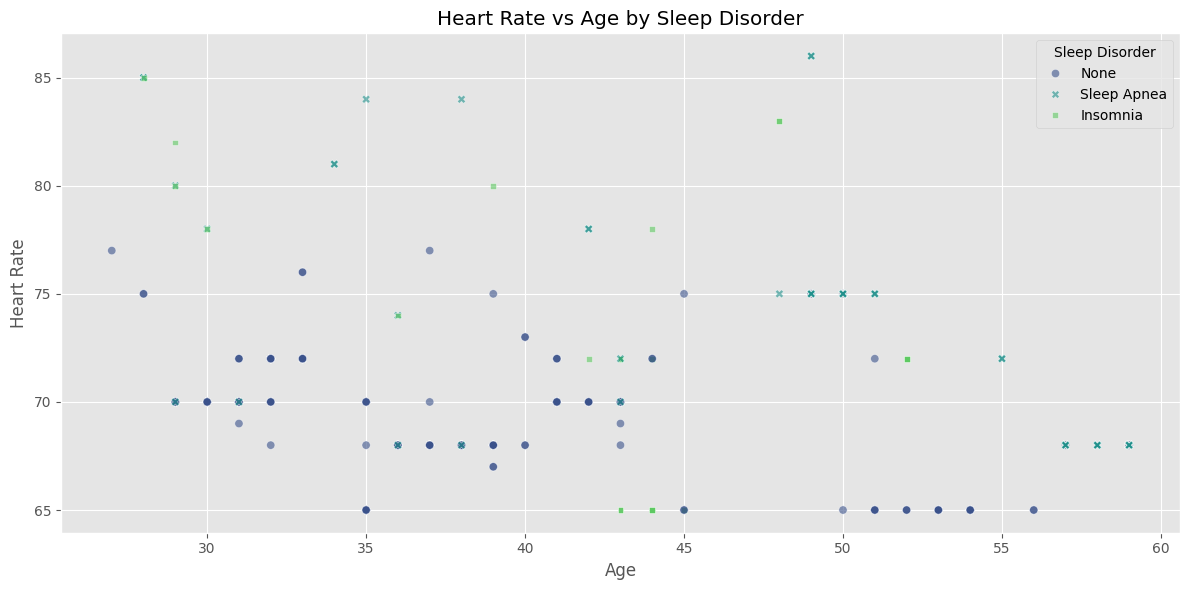

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Age', y='Heart Rate', hue='Sleep Disorder', style='Sleep Disorder', palette='viridis', alpha=0.6)
plt.title('Heart Rate vs Age by Sleep Disorder')
plt.tight_layout()
plt.savefig('graphs/heart_rate_vs_age_by_sleep_disorder.png')
plt.show()

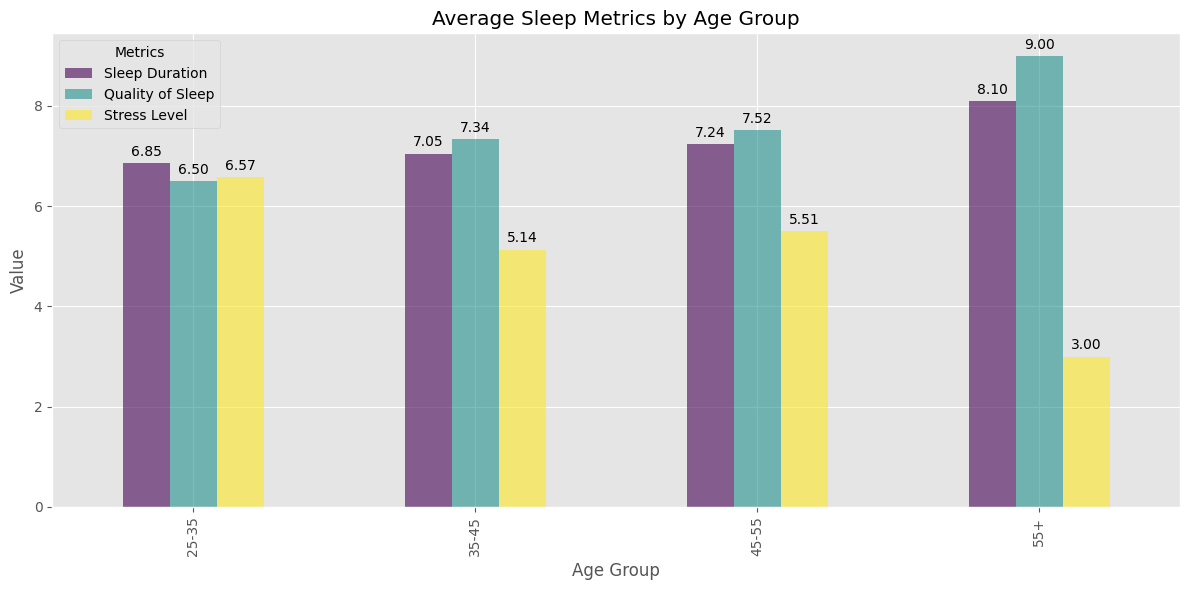

In [103]:
df['Age_Group'] = pd.cut(df['Age'], bins=[25,35,45,55,65], labels=['25-35','35-45','45-55','55+'])
age_metrics = df.groupby('Age_Group', observed= True)[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].mean()

fig, ax = plt.subplots(figsize=(12,6))
age_metrics.plot(kind='bar', ax=ax, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.title('Average Sleep Metrics by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.legend(title='Metrics')
plt.tight_layout()
plt.savefig('graphs/average_sleep_metrics_by_age_group.png')
plt.show()

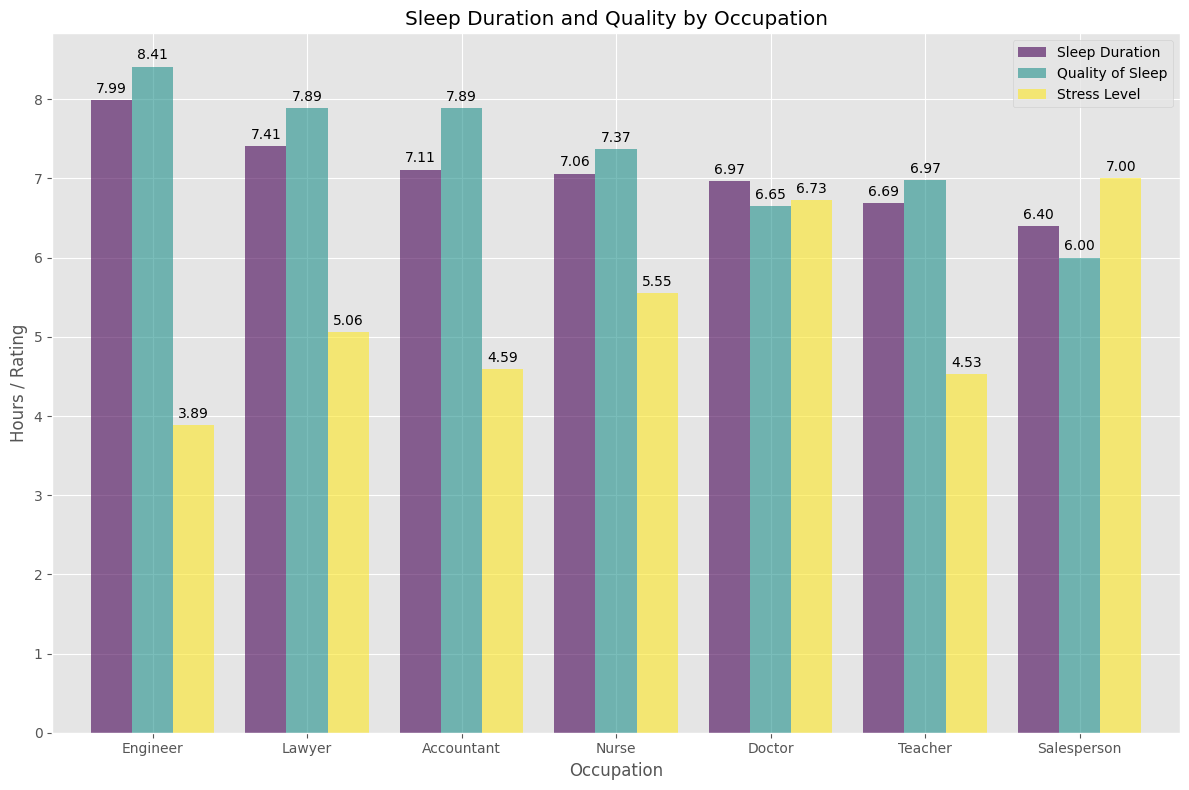

In [125]:
plt.style.use('ggplot')
top_occ = (df['Occupation'].value_counts() > (df.index.max() / 100) * 5)
top_occ = top_occ[top_occ == True].index
occ_sleep = df[df['Occupation'].isin(top_occ)].groupby('Occupation')[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].mean().sort_values(by='Sleep Duration', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
occ_sleep.plot(kind='bar', width=0.8, ax=ax, color=['#440154', '#21918c', '#fde725'], alpha=0.6)

plt.title('Sleep Duration and Quality by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours / Rating')
plt.xticks(rotation=0)


for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.tight_layout()
plt.savefig('graphs/sleep_duration_and_quality_by_occupation.png')
plt.show()

In [89]:
df2 = df.copy()
df2.replace({'Gender':{'Male': 0, 'Female': 1}, 'BMI Category':{'Normal': 0, 'Overweight': 1, 'Obese': 2}, 'Sleep Disorder':{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}}, inplace= True)
df2['Blood Pressure'] = df2['Blood Pressure'].str.split('/').str[0].astype(int)
df2.head()

C:\Users\Eda\AppData\Local\Temp\ipykernel_12336\4126030754.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Gender':{'Male': 0, 'Female': 1}, 'BMI Category':{'Normal': 0, 'Overweight': 1, 'Obese': 2}, 'Sleep Disorder':{'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}}, inplace= True)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_Group
Person ID,,,,,,,,,,,,,
1,0,27,Software Engineer,6.1,6,42,6,1,126,77,4200,0,25-35
2,0,28,Doctor,6.2,6,60,8,0,125,75,10000,0,25-35
3,0,28,Doctor,6.2,6,60,8,0,125,75,10000,0,25-35
4,0,28,Sales Representative,5.9,4,30,8,2,140,85,3000,1,25-35
5,0,28,Sales Representative,5.9,4,30,8,2,140,85,3000,1,25-35


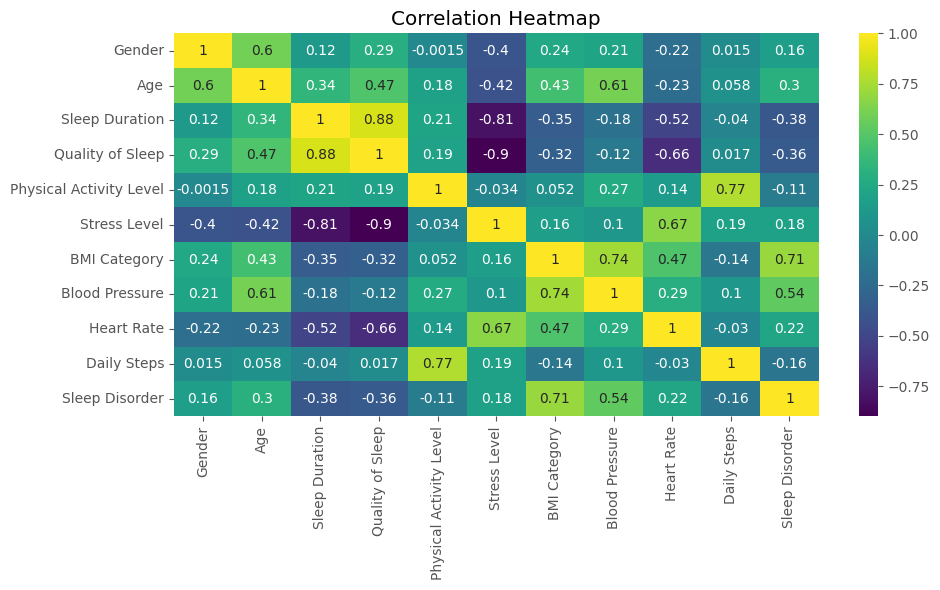

In [135]:
dfint = df2.select_dtypes(include= ['int64', 'float64'])
fig, ax = plt.subplots(figsize= (10,6))
sns.heatmap(dfint.corr(), annot= True, cmap= 'viridis', ax=ax)
plt.style.use('ggplot')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('graphs/correlation_heatmap.png')
plt.show()

In [91]:
corr_matrix = dfint.corr()
conditions = ((corr_matrix > 0.7) | (corr_matrix < -0.7)) & (corr_matrix != 1.0)

strong_correlations = []
for i in range(len(corr_matrix.columns)):
   for j in range(i):
       if conditions.iloc[i,j]:
           strong_correlations.append((
               corr_matrix.index[i],
               corr_matrix.columns[j],
               corr_matrix.iloc[i,j]
           ))

for feat1, feat2, corr in strong_correlations:
   print(f"{feat1} -- {feat2}: {corr:.3f}")

Quality of Sleep -- Sleep Duration: 0.883
Stress Level -- Sleep Duration: -0.811
Stress Level -- Quality of Sleep: -0.899
Blood Pressure -- BMI Category: 0.740
Daily Steps -- Physical Activity Level: 0.773
Sleep Disorder -- BMI Category: 0.708


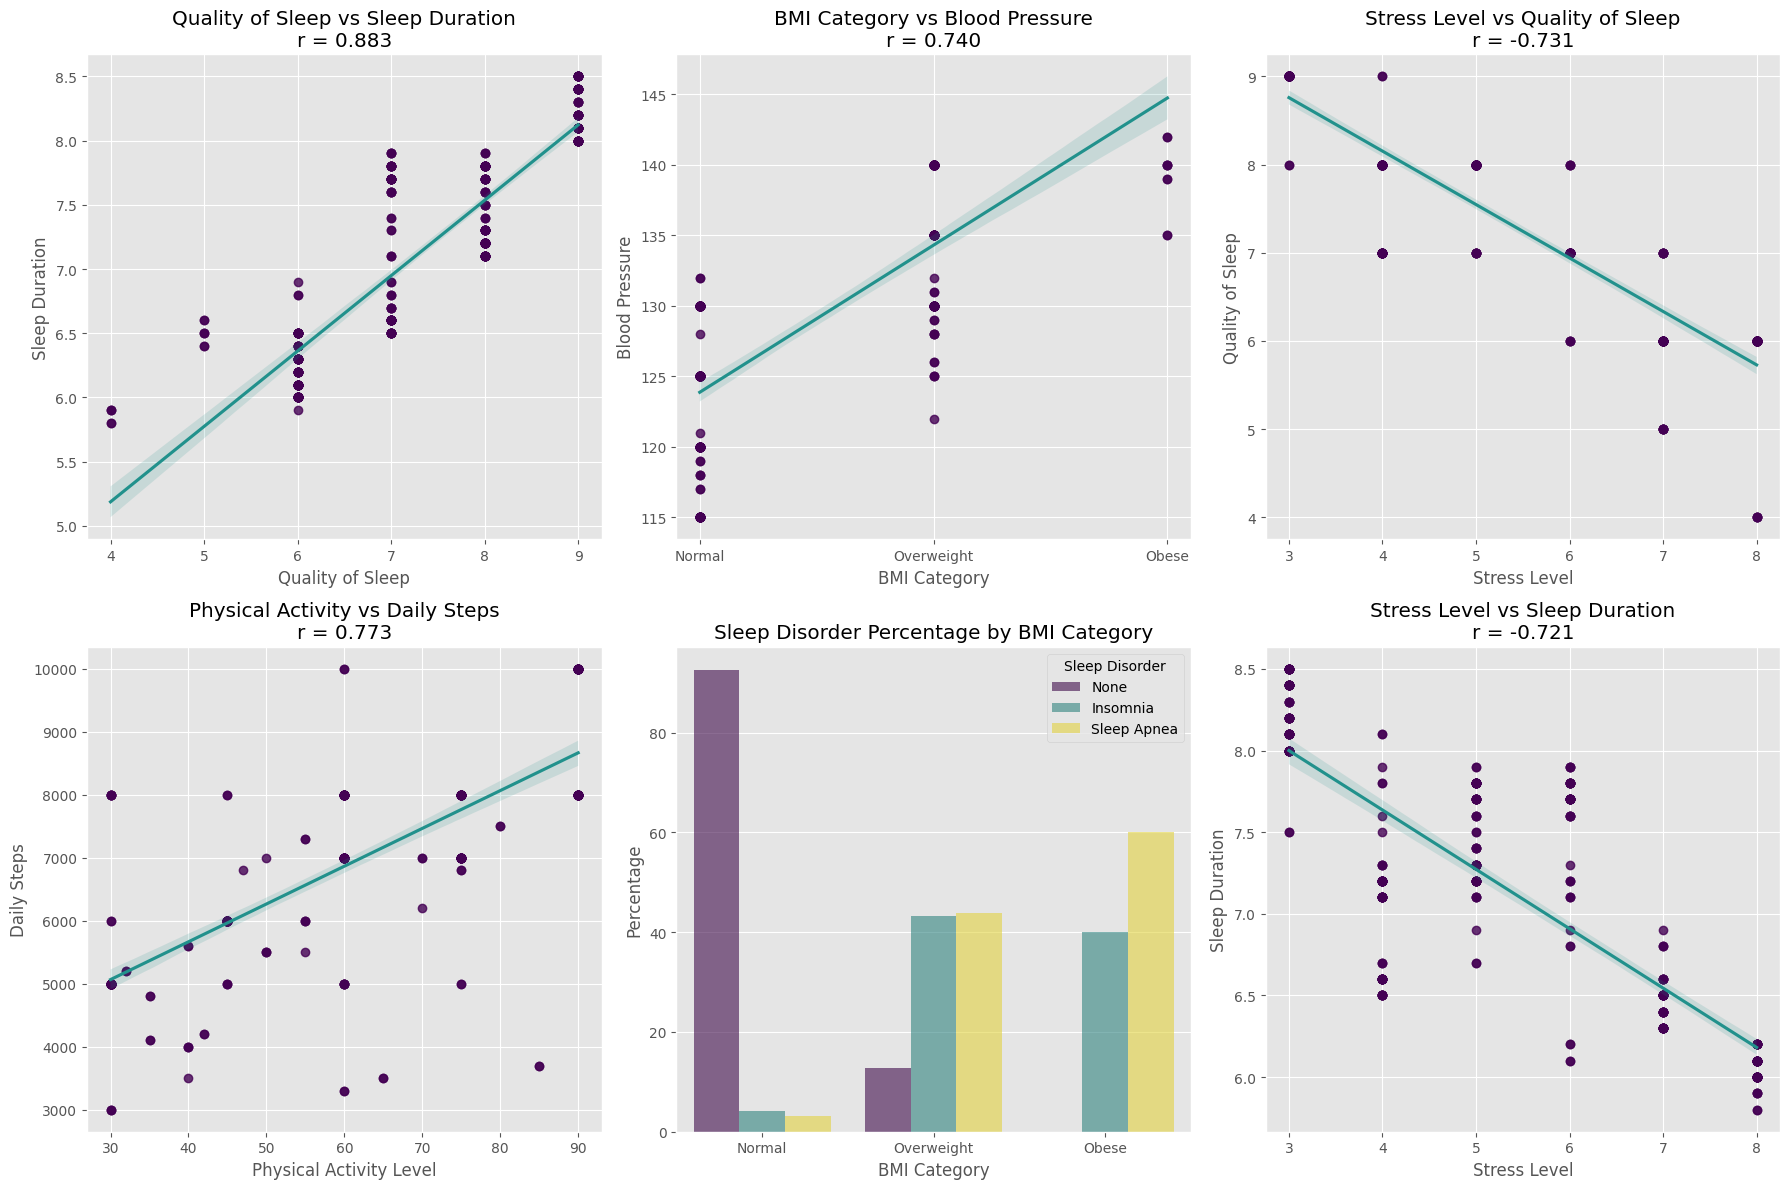

In [128]:
# Create figure with 2x2 subplots
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(18, 12))
plt.style.use('ggplot')

# Plot 1: Quality of Sleep vs Sleep Duration
sns.regplot(data=dfint, x='Quality of Sleep', y='Sleep Duration', ax=ax1, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax1.set_title('Quality of Sleep vs Sleep Duration\nr = 0.883')

# Plot 2: Blood Pressure vs BMI Category 
sns.regplot(data=dfint, x='BMI Category', y='Blood Pressure', ax=ax2, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax2.set_title('BMI Category vs Blood Pressure\nr = 0.740')
ax2.set_xlabel('BMI Category')
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['Normal', 'Overweight', 'Obese'])


# Plot 3: Daily Steps vs Physical Activity Level
sns.regplot(data=dfint, x='Physical Activity Level', y='Daily Steps', ax=ax3, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax3.set_title('Physical Activity vs Daily Steps\nr = 0.773')


# Plot 4: Sleep Disorder vs BMI Category
bmi_grouped = df.groupby('BMI Category')['Sleep Disorder'].value_counts().reset_index(name= 'Count')
count_bmi = bmi_grouped.groupby('BMI Category').sum()['Count']
bmi_grouped['Percentage'] = bmi_grouped.apply(lambda x: (x['Count'] / count_bmi[x['BMI Category']] * 100), axis=1)
bmi_order = ['Normal', 'Overweight', 'Obese']
bmi_grouped = bmi_grouped.sort_values('BMI Category', key=lambda x: pd.Categorical(x, categories=bmi_order))

sns.barplot(data=bmi_grouped, x='BMI Category', y='Percentage', hue='Sleep Disorder', ax=ax4, palette=['#440154', '#21918c', '#fde725'], alpha=0.6) 
ax4.set_title('Sleep Disorder Percentage by BMI Category')
ax4.set_ylabel('Percentage')
ax4.legend(title='Sleep Disorder') 

# Plot 5: Stress Level vs Quality of Sleep
sns.regplot(data=dfint, x='Stress Level', y='Quality of Sleep', ax=ax5, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax5.set_title('Stress Level vs Quality of Sleep\nr = -0.731')

# Plot 6: Stress Level vs Sleep Duration  
sns.regplot(data=dfint, x='Stress Level', y='Sleep Duration', ax=ax6, scatter_kws={'color': '#440154'}, line_kws={'color': '#21918c'})
ax6.set_title('Stress Level vs Sleep Duration\nr = -0.721')

# Adjust layout
plt.tight_layout()
plt.savefig('graphs/stress_level_vs_sleep_duration.png')
plt.show()

# Sleep Quality Analysis Report

## Data Cleaning and Preprocessing
Before diving into the analysis, we performed several data cleaning steps:
- Handled missing values in the Sleep Disorder column by filling them with 'None'
- Standardized categorical variables like BMI Category and Gender
- Created age groups for better demographic analysis
- Converted blood pressure readings to numeric format
- Validated data ranges and removed outliers where necessary

## Key Insights from the Analysis

### Correlation Analysis
![alt text](graphs/correlation_heatmap.png)
The correlation heatmap above reveals several interesting relationships in our sleep quality dataset:
- Strong positive correlation (0.883) between Sleep Quality and Sleep Duration
- Moderate negative correlation (-0.731) between Stress Level and Quality of Sleep
- Notable correlation between Physical Activity Level and Daily Steps (0.773)
- BMI Category shows meaningful correlation with Blood Pressure (0.740)

These correlations suggest that better sleep quality is associated with longer sleep duration, while higher stress levels tend to negatively impact both sleep quality and duration. Physical activity shows a clear relationship with daily step count, indicating consistent measurement of activity levels.

The subsequent visualizations explore these relationships in detail, examining how various factors like BMI, stress levels, and physical activity interact with sleep patterns and overall health metrics.


### Stress Level and Sleep Patterns ###
![alt text](graphs/stress_level_vs_sleep_duration.png)
The scatter plots above demonstrate the significant negative relationships between stress levels and sleep metrics:
- Higher stress levels are strongly associated with reduced sleep quality (r = -0.731)
- Similarly, increased stress correlates with shorter sleep duration (r = -0.721)
This suggests that stress management could be crucial for improving sleep outcomes.
 
### Occupational Impact on Sleep ###
![alt text](graphs/sleep_duration_and_quality_by_occupation.png)
Analysis by occupation reveals interesting patterns:
- Software Engineers and Scientists tend to report lower sleep duration and quality
- Teachers and Nurses generally show better sleep metrics
- High-stress professions appear to experience more sleep challenges

### Gender and Sleep Disorders ###
![alt text](graphs/sleep_disorder_distribution_by_gender.png)
The distribution of sleep disorders shows notable gender differences:
- Sleep Apnea appears more prevalent in males
- Insomnia rates are relatively balanced between genders
- A significant portion of both genders report no sleep disorders
 
### Age-Related Sleep Patterns ###
![alt text](graphs/average_sleep_metrics_by_age_group.png)
Sleep metrics across age groups reveal:
- Sleep quality tends to decrease with age
- Middle-age groups (35-45) show the most variable sleep patterns
- Younger adults generally report better sleep metrics
 
### Heart Rate and Sleep Disorders ###
![alt text](graphs/heart_rate_vs_age_by_sleep_disorder.png)
The relationship between heart rate, age, and sleep disorders indicates:
- Sleep Apnea patients tend to have higher heart rates across age groups
- Heart rate variability increases with sleep disorders
- Age appears to moderate the relationship between sleep disorders and heart rate

### Conclusion ###
This comprehensive analysis of sleep patterns and related health metrics reveals several important findings:

1. Sleep Quality Relationships:
    - Strong positive correlation with sleep duration
    - Significantly impacted by stress levels
    - Varies notably across occupations and age groups
 
2. Occupational Factors:
   - Technology and high-pressure jobs show poorer sleep metrics
   - Service-oriented professions (teachers, nurses) demonstrate better sleep patterns

3. Health Metrics:
   - Sleep disorders show clear gender-based patterns
   - Heart rate variability is strongly associated with sleep disorders
   - BMI and blood pressure demonstrate meaningful correlations

These insights suggest that interventions focusing on stress management, occupation-specific sleep strategies, and age-appropriate sleep hygiene could be beneficial. The strong correlations between various health metrics also indicate that a holistic approach to sleep health, considering factors like physical activity, stress management, and cardiovascular health, may be most effective.

Future research could explore specific interventions for high-risk groups and investigate the causal relationships between the correlated variables identified in this analysis.

